In [1]:
# import libraries

#SKlearn modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#numpy
import numpy as np 
#pandas
import pandas as pd 

#matplotlib for visualization
import matplotlib.pyplot as plt

#seaborn for visualization
import seaborn as sns



C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:

dataset = pd.read_csv("reported.csv")
dataset[:5]

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,NaN,NaN,NaN,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,NaN,NaN,NaN,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,NaN,NaN,NaN,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,NaN,NaN,NaN,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,NaN,NaN,NaN,4,236,101,237,0.0,103,7213000


In [3]:
dataset.columns

Index(['Year', 'crimes.total', 'crimes.penal.code', 'crimes.person', 'murder',
       'assault', 'sexual.offenses', 'rape', 'stealing.general', 'burglary',
       'house.theft', 'vehicle.theft', 'out.of.vehicle.theft', 'shop.theft',
       'robbery', 'fraud', 'criminal.damage', 'other.penal.crimes',
       'narcotics', 'drunk.driving', 'population'],
      dtype='object')

In [4]:
#check the whole dataset for missing data

Is_there_missing_data= dataset.isnull().any().any()
Is_there_missing_data

True

In [5]:
#total amount of rows and colunms

dataset.shape

(66, 21)

In [6]:
dataset.dtypes

Year                      int64
crimes.total              int64
crimes.penal.code         int64
crimes.person             int64
murder                    int64
assault                   int64
sexual.offenses           int64
rape                      int64
stealing.general          int64
burglary                  int64
house.theft             float64
vehicle.theft           float64
out.of.vehicle.theft    float64
shop.theft              float64
robbery                   int64
fraud                     int64
criminal.damage           int64
other.penal.crimes        int64
narcotics               float64
drunk.driving             int64
population                int64
dtype: object

In [7]:
dataset['murder'].value_counts()

2    31
1    26
3     8
4     1
Name: murder, dtype: int64

## DATA PREPROCESSING

#### replace missing data with mean of column

In [8]:

#replace rows with mean of each column with missing data

dataset=dataset.apply(lambda x: x.fillna(x.mean())) 
dataset.shape

#check the whole dataset for missing data

Is_there_missing_data= dataset.isnull().any().any()
Is_there_missing_data

False

### outlier detection

#### Outlier detection :visualization method

##### box plot

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


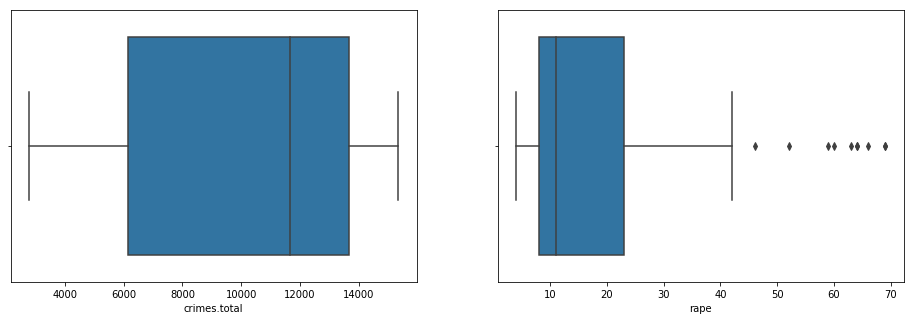

In [9]:

# Box Plot
import seaborn as sns
df=dataset

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

sns.boxplot(df['crimes.total'])

plt.subplot(1,2,2)

sns.boxplot(df['rape'])

plt.show()

###### distribution plot

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: Fut

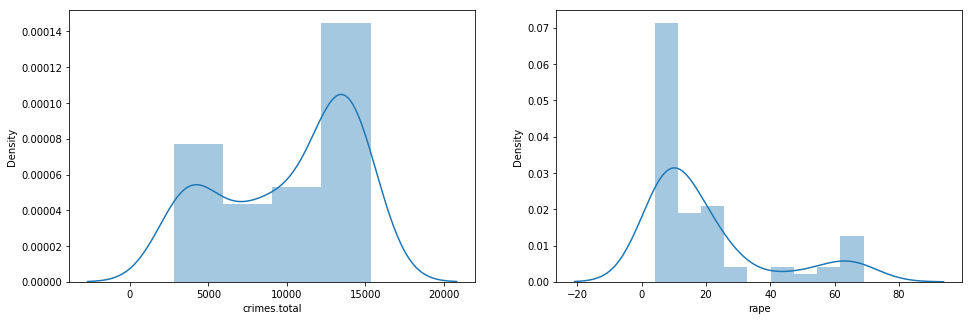

In [10]:
#### check for outliers

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['crimes.total'])
plt.subplot(1,2,2)
sns.distplot(df['rape'])

plt.show()

#### Z Score

In [11]:
# Z score for outlier detection
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))

print(z)

threshold = 2

# Position of the outlier
print(np.where(z > 2))



[[1.70600345 1.7415684  1.79728478 ... 1.30941688 2.68443589 1.86371119]
 [1.65351103 1.6222871  1.67126183 ... 1.30941688 2.42625511 1.78090132]
 [1.60101862 1.65186886 1.71233181 ... 1.30941688 2.24400984 1.70791635]
 ...
 [1.60101862 1.07800292 0.94990315 ... 2.08410923 0.8085983  1.82764402]
 [1.65351103 1.14647039 1.01544634 ... 2.01976093 0.68710146 1.97221041]
 [1.70600345 1.25430068 1.15553436 ... 1.94186562 0.62635303 2.11818035]]
(array([ 0,  0,  1,  2,  3, 15, 15, 16, 16, 17, 17, 18, 19, 34, 40, 58, 58,
       59, 59, 60, 60, 60, 61, 61, 62, 62, 62, 63, 63, 63, 63, 64, 64, 64,
       64, 65, 65, 65, 65], dtype=int64), array([ 9, 19, 19, 19, 19, 10, 13, 10, 13, 10, 13, 10, 10, 10, 11,  7, 16,
        7, 16,  4,  6,  7,  6,  7,  6,  7, 18,  6,  7, 15, 18,  6,  7, 15,
       18,  6,  7, 15, 20], dtype=int64))


#### Interquatile range

In [12]:

# IQR
Q1 = np.percentile(df, 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


In [13]:
# Above Upper bound
upper = df >= (Q3+1.5*IQR)

print("Upper bound:",upper)
print(np.where(upper))

# Below Lower bound
lower = df <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))


Upper bound:      Year  crimes.total  crimes.penal.code  crimes.person  murder  assault  \
0   False         False              False          False   False    False   
1   False         False              False          False   False    False   
2   False         False              False          False   False    False   
3   False         False              False          False   False    False   
4   False         False              False          False   False    False   
..    ...           ...                ...            ...     ...      ...   
61  False          True               True          False   False    False   
62  False          True               True          False   False    False   
63  False          True               True          False   False    False   
64  False          True               True          False   False    False   
65  False          True               True          False   False    False   

    sexual.offenses   rape  stealing.general  burg

#### Removing outliers

##### remove with zscore

In [14]:
d=df[(np.abs(stats.zscore(df)) < 2).all(axis=1)]
print (d.shape)

(47, 21)


##### remove with interquatile range

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

k = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(k.shape)

(51, 21)


#### or replace outlier with median

In [16]:
# or replace with median

ddd=df.drop(['murder'],axis=1)
median = ddd.median()
std = ddd.std()
outliers = (ddd - median).abs() > std

ddd[outliers] = np.nan

h=ddd.fillna(median)
h.shape

(66, 20)

### VISUALIZATIONS

### line chart

#### crime rate and burgalry per year

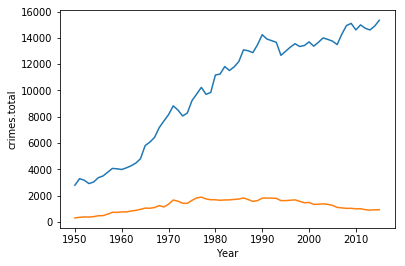

In [17]:
#may_flights = flights.query("month == 'May'")

datasettt = pd.read_csv("reported.csv")


sns.lineplot(data=datasettt, x="Year", y="crimes.total")
sns.lineplot(data=datasettt, x="Year", y="burglary")


### stackchart or density chart

#### Assault per year

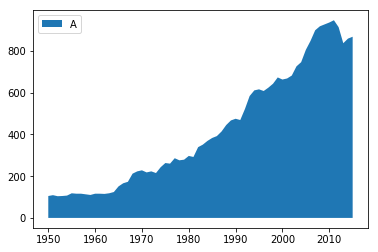

In [18]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 
# Data
x=datasettt['Year']
y=datasettt['assault']
 
# Plot
plt.stackplot(x,y)

plt.legend(loc='upper left',labels=['A'])
plt.show()



### scatterplot

#### fraud per year

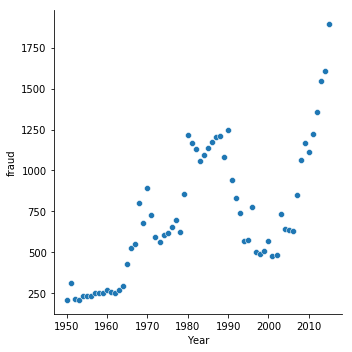

In [19]:
tips = datasettt
g = sns.relplot(data=tips, x="Year", y="fraud")


### barcharts

#### house theft per year

<function matplotlib.pyplot.show(*args, **kw)>

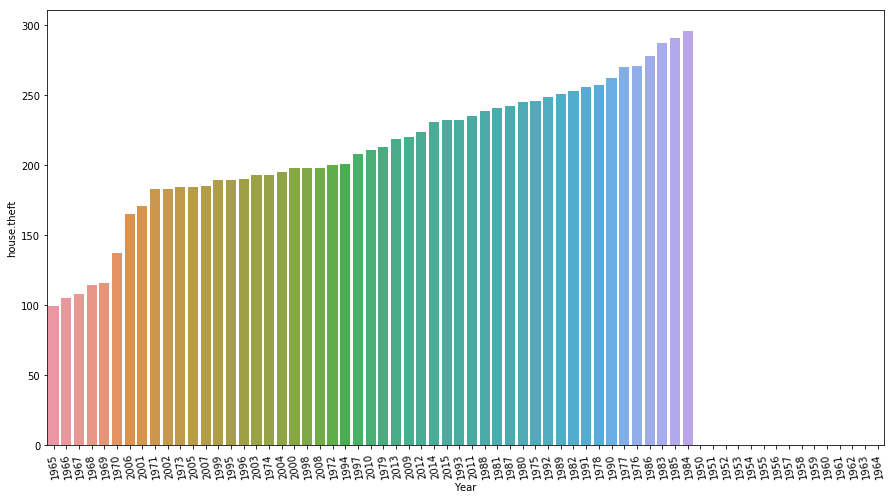

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,8))


ax=sns.barplot(x = 'Year', y = 'house.theft',data = datasettt,order=datasettt.sort_values('house.theft').Year)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 100)
plt.show

### histogram

#### rape per year

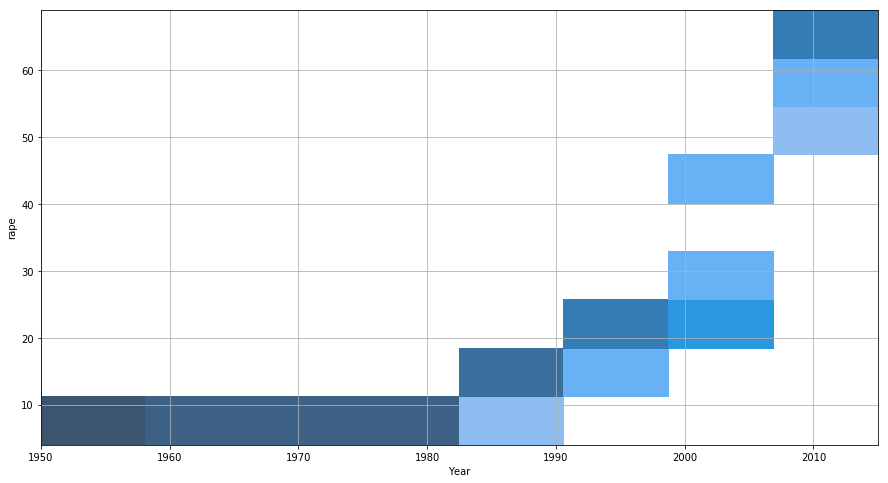

In [21]:
#### Heatmap
plt.figure(figsize = (15,8)) 

sns.histplot(data=df, x="Year", y="rape")

### NORMALIZE WITH MINMAX SCALER USINGTHE OUTLIERS VALUES REPLACED BY MEDIAN

In [22]:
#### Normalize data
from sklearn.preprocessing import MinMaxScaler

#normalize before dropping the target columns in other to use for correlation feature selection
s = MinMaxScaler() 

dataset = pd.read_csv("reported.csv")
dataset=dataset.apply(lambda x: x.fillna(x.mean())) 

#normalise while dropping target columns and encode the rest of the data in other to use for other feature selection
#use the ouutliers replaced by median
drpped= h
dfencoded= np.array(dataset['murder']).reshape(-1,1)


scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(drpped)

print (np.shape(scaled_values))


scaled_values[:5]

(66, 20)


array([[0.5       , 0.51922826, 0.51745161, 0.00186567, 0.00192308,
        0.15942029, 0.04      , 0.48797841, 0.49331849, 0.482066  ,
        0.55247238, 0.47984445, 0.50245857, 0.50724638, 0.56277056,
        0.5021645 , 0.49626866, 0.53781513, 0.48412698, 0.48648649],
       [0.5       , 0.51922826, 0.51745161, 0.01119403, 0.00961538,
        0.23188406, 0.08      , 0.48797841, 0.49331849, 0.482066  ,
        0.55247238, 0.47984445, 0.50245857, 0.50724638, 0.08658009,
        0.5021645 , 0.49626866, 0.53781513, 0.48412698, 0.48648649],
       [0.5       , 0.51922826, 0.51745161, 0.        , 0.        ,
        0.14492754, 0.        , 0.48797841, 0.49331849, 0.482066  ,
        0.55247238, 0.47984445, 0.50245857, 0.50724638, 0.56277056,
        0.5021645 , 0.49626866, 0.53781513, 0.48412698, 0.48648649],
       [0.5       , 0.51922826, 0.51745161, 0.        , 0.00192308,
        0.23188406, 0.04      , 0.48797841, 0.49331849, 0.482066  ,
        0.55247238, 0.47984445, 0.50245857, 0

In [23]:
#convert back to dataframe
scaled_values_to_df = pd.DataFrame(scaled_values, columns=drpped.columns,index=drpped.index)

#show first five rows of normalised data

scaled_values_to_df.head()

,Year,crimes.total,crimes.penal.code,crimes.person,assault,sexual.offenses,rape,stealing.general,burglary,house.theft,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,0.5,0.519228,0.517452,0.001866,0.001923,0.159420,0.04,0.487978,0.493318,0.482066,0.552472,0.479844,0.502459,0.507246,0.562771,0.502165,0.496269,0.537815,0.484127,0.486486
1,0.5,0.519228,0.517452,0.011194,0.009615,0.231884,0.08,0.487978,0.493318,0.482066,0.552472,0.479844,0.502459,0.507246,0.086580,0.502165,0.496269,0.537815,0.484127,0.486486
2,0.5,0.519228,0.517452,0.000000,0.000000,0.144928,0.00,0.487978,0.493318,0.482066,0.552472,0.479844,0.502459,0.507246,0.562771,0.502165,0.496269,0.537815,0.484127,0.486486
3,0.5,0.519228,0.517452,0.000000,0.001923,0.231884,0.04,0.487978,0.493318,0.482066,0.552472,0.479844,0.502459,0.507246,0.562771,0.502165,0.496269,0.537815,0.484127,0.486486
4,0.5,0.519228,0.517452,0.013060,0.005769,0.173913,0.04,0.487978,0.493318,0.482066,0.552472,0.479844,0.502459,0.507246,0.562771,0.502165,0.496269,0.537815,0.484127,0.486486


## FEATURE SELECTION

### FILTER METHOD

#### chi square

In [24]:
#using chi square

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

#DEFINE X FOR FEATURES, AND Y FOR TARGET

X= scaled_values_to_df #Feature Matrix
y = dataset["murder"] #target

X_norm = MinMaxScaler().fit_transform(X)

#print(np.shape(X_norm))

chi_selector = SelectKBest(chi2, k=10)

chi_Features_for_training = chi_selector.fit_transform(X, y)

#print (np.shape(chi_Features_for_training))

chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()

print('Original feature number:', X.shape[1])

print(str(len(chi_feature)), 'selected features')

print(chi_feature)



Original feature number: 20
10 selected features
['Year', 'crimes.total', 'crimes.penal.code', 'crimes.person', 'assault', 'sexual.offenses', 'rape', 'burglary', 'robbery', 'population']


#### pearson correlation

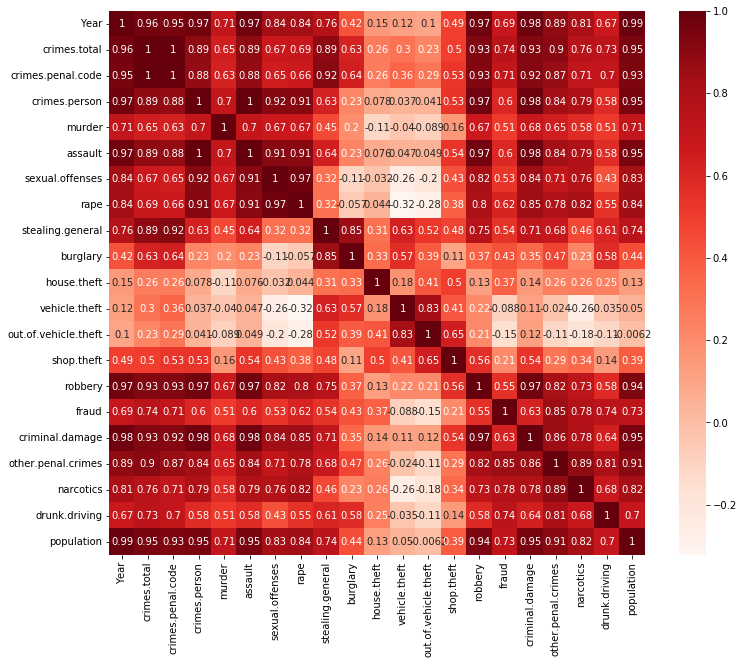

In [25]:
#using Pearson correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [26]:
#Correlation with output variable
cor_target = abs(cor["murder"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print('Original feature number:', dataset.shape[1])
print ("the relevant features are",len(relevant_features))
print ("the relevant features are",relevant_features)

Original feature number: 21
the relevant features are 15
the relevant features are Year                  0.711252
crimes.total          0.645602
crimes.penal.code     0.631088
crimes.person         0.703834
murder                1.000000
assault               0.702906
sexual.offenses       0.674073
rape                  0.669512
robbery               0.667353
fraud                 0.505537
criminal.damage       0.682365
other.penal.crimes    0.647027
narcotics             0.581683
drunk.driving         0.513687
population            0.712011
Name: murder, dtype: float64


#### information gain

[0.19097978 0.34690445 0.39508946 0.4398323  0.47544798 0.27571416
 0.43847161 0.14478233 0.17889761 0.20949402 0.26482311 0.
 0.04761716 0.22395878 0.19465517 0.19449295 0.0633333  0.15772806
 0.00393278 0.25041402]


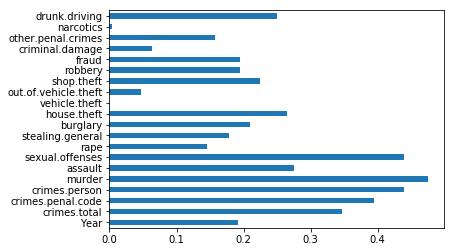

In [27]:

from sklearn.feature_selection import mutual_info_classif



#Specify features
X =scaled_values_to_df #Feature Matrix

#Specify target
y = dataset["murder"]

res = mutual_info_classif(X, y)

feat_importance=pd.Series(res,dataset.columns[0:len(dataset.columns)-1])

feat_importance.plot(kind='barh')
             
print(res)


#### Anova or univariate statistical test

In [28]:
# Feature Selection with ANOVA or Univariate Statistical Tests

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#Specify features
X =scaled_values_to_df #Feature Matrix

#Specify target
y = dataset["murder"]
# feature extraction
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=10)

features = fit.transform(X)
# summarize selected features
ANOVA_Features_for_training = test.fit_transform(X, y)

#print (np.shape(chi_Features_for_training))

ANOVA_support = test.get_support()

ANOVA_feature = X.loc[:,ANOVA_support].columns.tolist()

print('The Dataset features are:', X.shape[1])



print('The selected features with ANOVA(Filter Method) are', len(ANOVA_feature))

print("They are:")

print(ANOVA_feature)



The Dataset features are: 20
The selected features with ANOVA(Filter Method) are 10
They are:
['Year', 'crimes.total', 'crimes.penal.code', 'crimes.person', 'assault', 'rape', 'burglary', 'robbery', 'criminal.damage', 'population']


### WRAPPER METHOD

#### RFE

In [29]:
#using RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE

#DEFINE X FOR FEATURES, AND Y FOR TARGET

X= scaled_values_to_df  #Feature Matrix
y = dataset["murder"] #target

rfe_for_training = rfe.fit_transform(X,y)  

#print (np.shape(rfe_for_training))

#Fitting the data to model

#print(rfe.support_)
#print(rfe.ranking_)

rfe_support = rfe.get_support()

rfe_feature = X.loc[:,rfe_support].columns.tolist()

print('Original feature number:', X.shape[1])



print(str(len(chi_feature)), 'selected features')

print(rfe_feature)

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Original feature number: 20
10 selected features
['Year', 'crimes.total', 'crimes.person', 'assault', 'sexual.offenses', 'stealing.general', 'burglary', 'shop.theft', 'robbery', 'population']


#### forward selection

In [30]:
#using forward_selection
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

#Specify features
X =scaled_values_to_df 

#Specify target
y = dataset["murder"]

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_  

forward_Features_for_training = sfs.fit_transform(X, y)

#print (np.shape(chi_Features_for_training))

#forward_support = sfs.get_support()
#forward_feature = X.loc[:,forward_support].columns.tolist()


print('The Dataset features are:', X.shape[1])



print(str(len(sfs.k_feature_names_)), 'selected features using forward selection (Wrapper Method) ')

print ("They are")

sfs.k_feature_names_

The Dataset features are: 20
11 selected features using forward selection (Wrapper Method) 
They are


('Year',
 'crimes.total',
 'crimes.person',
 'assault',
 'sexual.offenses',
 'stealing.general',
 'burglary',
 'shop.theft',
 'robbery',
 'fraud',
 'criminal.damage')

#### backward method

In [31]:
#using backward_elimination
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

#Specify features
X =scaled_values_to_df 

#Specify target
y = dataset["murder"]

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_  

backward_Features_for_training = sfs.fit_transform(X, y)
print('The Dataset features are:', X.shape[1])
print(str(len(sfs.k_feature_names_)), 'selected features using forward selection (Wrapper Method) ')
print ("They are")

sfs.k_feature_names_

The Dataset features are: 20
11 selected features using forward selection (Wrapper Method) 
They are


('Year',
 'crimes.total',
 'crimes.person',
 'assault',
 'sexual.offenses',
 'stealing.general',
 'burglary',
 'shop.theft',
 'robbery',
 'narcotics',
 'population')

### EMBEDDED METHOD

#### Lasso (L1 Regularization)

In [32]:
#using lasso
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

X= scaled_values_to_df#Feature Matrix
y = dataset["murder"] #target

scaler = StandardScaler()
scaler.fit(X)
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X.fillna(0)), y)

lasso_for_training=sel_.fit_transform(X.fillna(0), y)


#print (np.shape(lasso_for_training))

sel_support = sel_.get_support()

#print(sel_support)

selected_feat = X.columns[(sel_.get_support())]


print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(selected_feat)

print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 20
selected features: 4
Index(['crimes.person', 'assault', 'rape', 'burglary'], dtype='object')
features with coefficients shrank to zero: 73


#### Ridge Regression(L2 Regularisation)

In [33]:
#using Ridge Regression(L2 Regularisation)
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

#Specify features
X =scaled_values_to_df

#Specify target
y = dataset["murder"]

s = StandardScaler()
s.fit(X)

#Specify L2 regularization
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
sel_.fit(s.transform(X.fillna(0)), y)

Ridge_for_training=sel_.fit_transform(X.fillna(0), y)

#print (np.shape(lasso_for_training))

sel_support = sel_.get_support()

#print(sel_support)

selected_feat = X.columns[(sel_.get_support())]


print('The Dataset features are: {}'.format((X.shape[1])))
print('selected features using Ridge Regression (Embedded Method)  {}'.format(len(selected_feat)))

print ("They are")

print(selected_feat)



The Dataset features are: 20
selected features using Ridge Regression (Embedded Method)  7
They are
Index(['crimes.total', 'crimes.penal.code', 'crimes.person', 'assault', 'rape',
       'burglary', 'narcotics'],
      dtype='object')


#### Random Forest Importance

7 selected features
['crimes.total', 'crimes.penal.code', 'crimes.person', 'assault', 'rape', 'stealing.general', 'burglary']


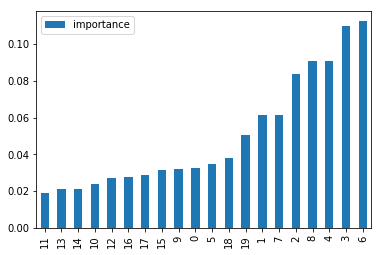

In [34]:
#using random forest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


X= scaled_values_to_df   #Feature Matrix
y = dataset["murder"] #target

embeded_rf_selector = RandomForestClassifier(n_estimators=100)
embeded_rf_selector.fit(X, y)

importance=embeded_rf_selector.feature_importances_

#dataframe for visualization
final_df=pd.DataFrame({"Features": pd.DataFrame(X).columns, "importance":importance})
final_df.set_index('importance')

final_df=final_df.sort_values('importance')

final_df.plot.bar()


#feature selection
embeded_rf_selector2 = SelectFromModel(RandomForestClassifier(n_estimators=100))
embeded_rf_selector2.fit(X, y)
rf_for_training=embeded_rf_selector2.fit_transform(X, y)
#print (np.shape(rf_for_training))


embeded_rf_support = embeded_rf_selector2.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

### PRICINPLE COMPONENT ANALYSIS (PCA)

In [35]:

# Feature Extraction with PCA

from sklearn.decomposition import PCA
X = scaled_values_to_df #Feature Matrix

# feature extraction
pca = PCA(n_components=5)
fitt = pca.fit(X)

PCA_featuress_for_training = fitt.transform(X)
# summarize components
print("Explained Variance: %s" % fitt.explained_variance_ratio_)
print(fitt.components_)

Explained Variance: [0.458007953  0.1263825305 0.0965043568 0.069223275  0.0507519918]
[[ 0.2781697463  0.2472204491  0.3000264039  0.3504448003  0.3477691604
   0.2552570285  0.2933626897  0.1997248652  0.1086584374  0.0036801721
   0.1205380481  0.1186676273  0.1622563459  0.2909100476  0.0940995119
   0.2712468204  0.1091846696  0.0958213135  0.0993953197  0.2680029964]
 [-0.0113469668 -0.3986587523 -0.3693793253  0.1693075158  0.1706056243
  -0.0654133437  0.0011761536 -0.0034737211  0.5897133596  0.1398901529
   0.1281050917  0.0150118085 -0.3166948512  0.1408308576  0.2611675074
   0.0223089255  0.0815713859 -0.1566750591  0.1953522546 -0.0164844485]
 [ 0.1892666632 -0.2031178444 -0.1563402578 -0.1718120648 -0.1696481873
   0.1274218412  0.1288950457  0.2457306037  0.3775224771 -0.3806054424
   0.0023915806  0.0350069701  0.0706001019 -0.0722641751 -0.3987600788
   0.1369414048 -0.0956182265  0.0370327355 -0.4539334516  0.2319299501]
 [-0.180701392  -0.1004339904 -0.1098231633  0

In [36]:
dataset["murder"].value_counts()

2    31
1    26
3     8
4     1
Name: murder, dtype: int64

## TRAINING

### NAIVE BAYES TRAINING WITHOUT FEATURE SELECTION

In [37]:

#without feature selection

#use outliers replaced with median
X2=h
#X2=dataset.drop([' shares','url'],axis=1)
print (np.shape(X2))

y = dataset["murder"]


# build the training and testing sets (80% For training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)
#using gausian Naive Bayes with chisquare feature selection


from sklearn.naive_bayes import GaussianNB

#import
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor

model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)

train_acc = model.score(X_train, y_train) # mean acc on train data

test_acc = model.score(X_test, y_test)
print("Training accuracy of naive bayes without Feature selection is:", train_acc )
print("Testing accuracy of naive bayes without Feature selection is:", test_acc)

predictions = model.predict(X_test)
CM = confusion_matrix(y_test,predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

(66, 20)
Training accuracy of naive bayes without Feature selection is: 0.8478260869565217
Testing accuracy of naive bayes without Feature selection is: 0.6
              precision    recall  f1-score   support

           1       0.70      0.78      0.74         9
           2       0.67      0.44      0.53         9
           3       0.25      0.50      0.33         2

    accuracy                           0.60        20
   macro avg       0.54      0.57      0.53        20
weighted avg       0.64      0.60      0.60        20



### NAIVE BAYES TRAINING WITH FEATURE SELECTION

##### COMPARING CHISQUARE , RFE , AND LASSO

##### CHISQUARE

In [38]:

#Using filter method chisquare

X2=chi_Features_for_training
#X2=dataset.drop([' shares','url'],axis=1)
print (np.shape(X2))

y = dataset["murder"]






(66, 10)


In [39]:
# build the training and testing sets (80% For training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

In [40]:
X_train.shape

(52, 10)

In [41]:
#using gausian Naive Bayes with chisquare feature selection


from sklearn.naive_bayes import GaussianNB

#import
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor


model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)

train_acc = model.score(X_train, y_train) # mean acc on train data

test_acc = model.score(X_test, y_test)


print("Training accuracy of naive bayes for chisquare (Filter method) Feature selection is:", train_acc )
print("Testing accuracy of naive bayes for chisquare (Filter method) Feature selection is:", test_acc)

predictions = model.predict(X_test)
CM = confusion_matrix(y_test,predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

Training accuracy of naive bayes for chisquare (Filter method) Feature selection is: 0.7307692307692307
Testing accuracy of naive bayes for chisquare (Filter method) Feature selection is: 0.7857142857142857
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.67      0.80         6
           3       0.60      0.75      0.67         4

    accuracy                           0.79        14
   macro avg       0.80      0.81      0.79        14
weighted avg       0.83      0.79      0.79        14



#### RFE

In [42]:

#Using Wrapper method RFE

X2=rfe_for_training
#X2=dataset.drop([' shares','url'],axis=1)
print (np.shape(X2))

y = dataset["murder"]

# build the training and testing sets (80% For training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

#using gausian Naive Bayes with chisquare feature selection


from sklearn.naive_bayes import GaussianNB

#import
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor


model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)

train_acc = model.score(X_train, y_train) # mean acc on train data

test_acc = model.score(X_test, y_test)


print("Training accuracy of naive bayes for RFE (Wrapper method) Feature selection is:", train_acc )
print("Testing accuracy of naive bayes for RFE (Wrapper method) Feature selection is:", test_acc)
predictions = model.predict(X_test)
CM = confusion_matrix(y_test,predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

(66, 10)
Training accuracy of naive bayes for RFE (Wrapper method) Feature selection is: 0.75
Testing accuracy of naive bayes for RFE (Wrapper method) Feature selection is: 0.7142857142857143
              precision    recall  f1-score   support

           1       0.62      1.00      0.77         5
           2       1.00      0.67      0.80         6
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         1

    accuracy                           0.71        14
   macro avg       0.53      0.54      0.52        14
weighted avg       0.72      0.71      0.69        14



C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### LASSO

In [43]:

#Using embedded method lasso

X2=lasso_for_training
#X2=dataset.drop([' shares','url'],axis=1)
print (np.shape(X2))

y = dataset["murder"]

# build the training and testing sets (80% For training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

#using gausian Naive Bayes with chisquare feature selection


from sklearn.naive_bayes import GaussianNB

#import
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor


model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)

train_acc = model.score(X_train, y_train) # mean acc on train data

test_acc =model.score(X_test, y_test)


print("Training accuracy of naive bayes for RFE (Wrapper method) Feature selection is:", train_acc )
print("Testing accuracy of naive bayes for RFE (Wrapper method) Feature selection is:", test_acc)
predictions =model.predict(X_test)
CM = confusion_matrix(y_test,predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

(66, 4)
Training accuracy of naive bayes for RFE (Wrapper method) Feature selection is: 0.8076923076923077
Testing accuracy of naive bayes for RFE (Wrapper method) Feature selection is: 0.7142857142857143
              precision    recall  f1-score   support

           1       0.67      0.86      0.75         7
           2       0.75      0.75      0.75         4
           3       1.00      0.33      0.50         3

    accuracy                           0.71        14
   macro avg       0.81      0.65      0.67        14
weighted avg       0.76      0.71      0.70        14



#### PCA

In [44]:

#Using embedded method lasso

X2=PCA_featuress_for_training
#X2=dataset.drop([' shares','url'],axis=1)
print (np.shape(X2))

y = dataset["murder"]

# build the training and testing sets (80% For training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

#using gausian Naive Bayes with chisquare feature selection


from sklearn.naive_bayes import GaussianNB

#import
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor


model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)

train_acc =model.score(X_train, y_train) # mean acc on train data

test_acc = model.score(X_test, y_test)


print("Training accuracy of naive bayes for RFE (Wrapper method) Feature selection is:", train_acc )
print("Testing accuracy of naive bayes for RFE (Wrapper method) Feature selection is:", test_acc)
predictions =model.predict(X_test)
CM = confusion_matrix(y_test,predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

(66, 5)
Training accuracy of naive bayes for RFE (Wrapper method) Feature selection is: 0.75
Testing accuracy of naive bayes for RFE (Wrapper method) Feature selection is: 0.7142857142857143
              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       1.00      0.67      0.80         9
           3       0.00      0.00      0.00         1

    accuracy                           0.71        14
   macro avg       0.52      0.56      0.51        14
weighted avg       0.81      0.71      0.72        14



### Compare algorithms using lasso feature selection

#### Naive bayes

In [45]:
#using gausian Naive Bayes with chisquare feature selection


from sklearn.naive_bayes import GaussianNB

#import
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor

#Using embedded method lasso

X2=lasso_for_training
#X2=dataset.drop([' shares','url'],axis=1)
print (np.shape(X2))

y = dataset["murder"]

# build the training and testing sets (80% For training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)

train_acc = model.score(X_train, y_train) # mean acc on train data

test_acc = model.score(X_test, y_test)


print("Training accuracy of naive bayes for lasso (Embedded method) Feature selection is:", train_acc )
print("Testing accuracy of naive bayes for lasso (Embedded method) Feature selection is:", test_acc)

(66, 4)
Training accuracy of naive bayes for lasso (Embedded method) Feature selection is: 0.8461538461538461
Testing accuracy of naive bayes for lasso (Embedded method) Feature selection is: 0.5


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.50      0.60      0.55         5
           2       0.60      0.50      0.55         6
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         1

    accuracy                           0.50        14
   macro avg       0.36      0.40      0.37        14
weighted avg       0.48      0.50      0.49        14



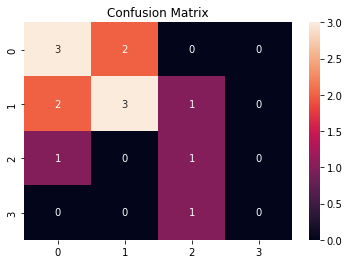

In [46]:
predictions = model.predict(X_test)
CM = confusion_matrix(y_test,predictions)
#### TO test on another data
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(CM,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

#### K neaerest neighbor

In [58]:
#using gausian Naive Bayes with chisquare feature selection


#import 

from sklearn.neighbors import KNeighborsClassifier

#Using embedded method lasso

X2=lasso_for_training
#X2=dataset.drop([' shares','url'],axis=1)
print (np.shape(X2))

y = dataset["murder"]

# build the training and testing sets (80% For training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)

train_acc =model.score(X_train, y_train) # mean acc on train data

test_acc =model.score(X_test, y_test)


print("Training accuracy of knearest neighbor for lasso (Embedded method) Feature selection is:", train_acc )
print("Testing accuracy of knearest neighbor for lasso (Embedded method) Feature selection is:", test_acc)

(66, 4)
Training accuracy of knearest neighbor for lasso (Embedded method) Feature selection is: 0.8076923076923077
Testing accuracy of knearest neighbor for lasso (Embedded method) Feature selection is: 0.5


              precision    recall  f1-score   support

           1       0.57      0.80      0.67         5
           2       0.50      0.43      0.46         7
           3       0.00      0.00      0.00         2

    accuracy                           0.50        14
   macro avg       0.36      0.41      0.38        14
weighted avg       0.45      0.50      0.47        14



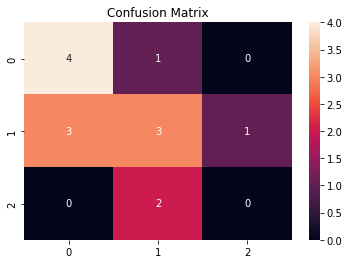

In [59]:
predictions = model.predict(X_test)
CM = confusion_matrix(y_test,predictions)
#### TO test on another data
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
sns.heatmap(CM,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

#### SVM

In [60]:
from sklearn.svm import SVC

#Using embedded method lasso

X2=lasso_for_training
#X2=dataset.drop([' shares','url'],axis=1)
#print (np.shape(X2))

y = dataset["murder"]

# build the training and testing sets (80% For training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)

train_acc =model.score(X_train, y_train) # mean acc on train data

test_acc =model.score(X_test, y_test)


print("Training accuracy of SVM for lasso (Embedded method) Feature selection is:", train_acc )
print("Testing accuracy of SVM for lasso (Embedded method) Feature selection is:", test_acc)


Training accuracy of SVM for lasso (Embedded method) Feature selection is: 0.8076923076923077
Testing accuracy of SVM for lasso (Embedded method) Feature selection is: 0.5714285714285714


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.57      0.80      0.67         5
           2       0.57      0.67      0.62         6
           3       0.00      0.00      0.00         3

    accuracy                           0.57        14
   macro avg       0.38      0.49      0.43        14
weighted avg       0.45      0.57      0.50        14



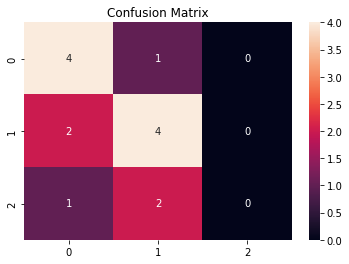

In [61]:
predictions = model.predict(X_test)
CM = confusion_matrix(y_test,predictions)
#### TO test on another data
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(CM,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

#### CNN

In [62]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

x_train=X_train

# define model
n_features = 4

model22 = Sequential()
model22.add(Dense(76, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model22.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model22.add(Dense(4, activation='sigmoid'))
# compile the model
model22.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# fit the model

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

yyy=lb.fit_transform(y_train.astype(str)) 

#y_train = np.reshape((-1,1)
history=model22.fit(x_train,yyy, epochs=10, batch_size=8, verbose=1)
# evaluate the model
print(history)

Epoch 1/10
7/7 [==============================] - 2s 5ms/step - loss: 0.2068 - accuracy: 0.4808
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.1977 - accuracy: 0.4808
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.1906 - accuracy: 0.4808
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.1842 - accuracy: 0.4808
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.1777 - accuracy: 0.4808
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.1718 - accuracy: 0.4808
Epoch 7/10
7/7 [==============================] - ETA: 0s - loss: 0.1681 - accuracy: 0.50 - 0s 7ms/step - loss: 0.1650 - accuracy: 0.4808
Epoch 8/10
7/7 [==============================] - 0s 12ms/step - loss: 0.1588 - accuracy: 0.4808
Epoch 9/10
7/7 [==============================] - 0s 6ms/step - loss: 0.1537 - accuracy: 0.4808
Epoch 10/10
7/7 [==============================] - 0s 7ms/step - loss: 0.1500 - accuracy: 0.

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.25      0.60      0.35         5
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         3

    accuracy                           0.21        14
   macro avg       0.08      0.20      0.12        14
weighted avg       0.09      0.21      0.13        14



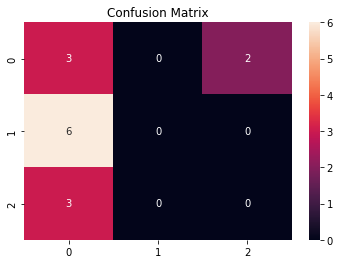

In [63]:
predictions = model22.predict(X_test)

pred = np.argmax(predictions, axis=1)
# label
#y_train = np.argmax(y_train, axis=1)


CM = confusion_matrix(y_test,pred)


#### TO test on another data
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(CM,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

#### LSTM

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import numpy as np

x_train=X_train

input_ = Input(shape=(4)) # shape from train_data

embedded = Embedding(36, 256, input_length = 52)(input_) 

lstm = LSTM(256, return_sequences=False)(embedded) # --> ERROR
dense = Dense(4, activation='relu')(lstm) 

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labelss = lb.fit_transform(y_train)
#y_train=pd.get_dummies(y_train)

model2 = Model(input_, dense)
model2.summary()
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
H=model2.fit(X_train,labelss, epochs=5, batch_size=1, verbose=2)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 4, 256)            9216      
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 1028      
Total params: 535,556
Trainable params: 535,556
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


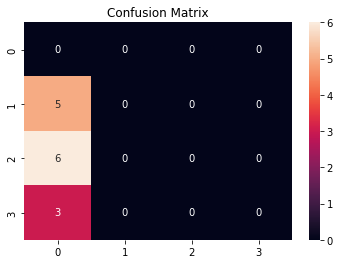

In [73]:
predictions = model2.predict(X_test)
pred = np.argmax(predictions, axis=1)
CM = confusion_matrix(y_test,pred)
#### TO test on another data
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
sns.heatmap(CM,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       6.0
           3       0.00      0.00      0.00       3.0

    accuracy                           0.00      14.0
   macro avg       0.00      0.00      0.00      14.0
weighted avg       0.00      0.00      0.00      14.0



C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\

### Save trained model

In [67]:
#To pickle or save the ml model
import pickle

pickle_out = open("crime_prediction.pickle","wb")
#use the model trained with the pipeline
pickle.dump(model, pickle_out)
pickle_out.close()

In [68]:
# savig and using your trained model
pickle_in = open("crime_prediction.pickle","rb")
model = pickle.load(pickle_in)